In [1]:
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import os
from predict import predict, draw_bbox
import numpy as np
import random
from tqdm import tqdm

%matplotlib inline

In [3]:
test_path = "E:/data/INRIAPerson/Test/pos"
file_list = os.listdir(test_path)
clf = joblib.load('../data/svc_v2.pkl')

## Random plot

In [4]:
file = test_path + os.sep + file_list[random.randint(0, len(file_list)-1)]

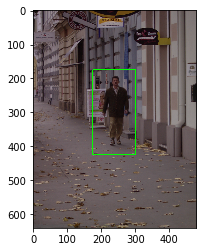

In [5]:
bbox_list = predict(file, clf, 1.25, threshold=0.5)
img = draw_bbox(file, bbox_list)
plt.imshow(img)

## Random batch plot

In [6]:
random.seed(2018)
file_list = random.sample(file_list, 10)

In [7]:
bbox_list_list = []
for file in tqdm(file_list):
    bbox_list = predict(test_path + os.sep + file, clf, 1.25, threshold=0.5)
    bbox_list_list.append(bbox_list)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [03:13<00:00, 19.36s/it]


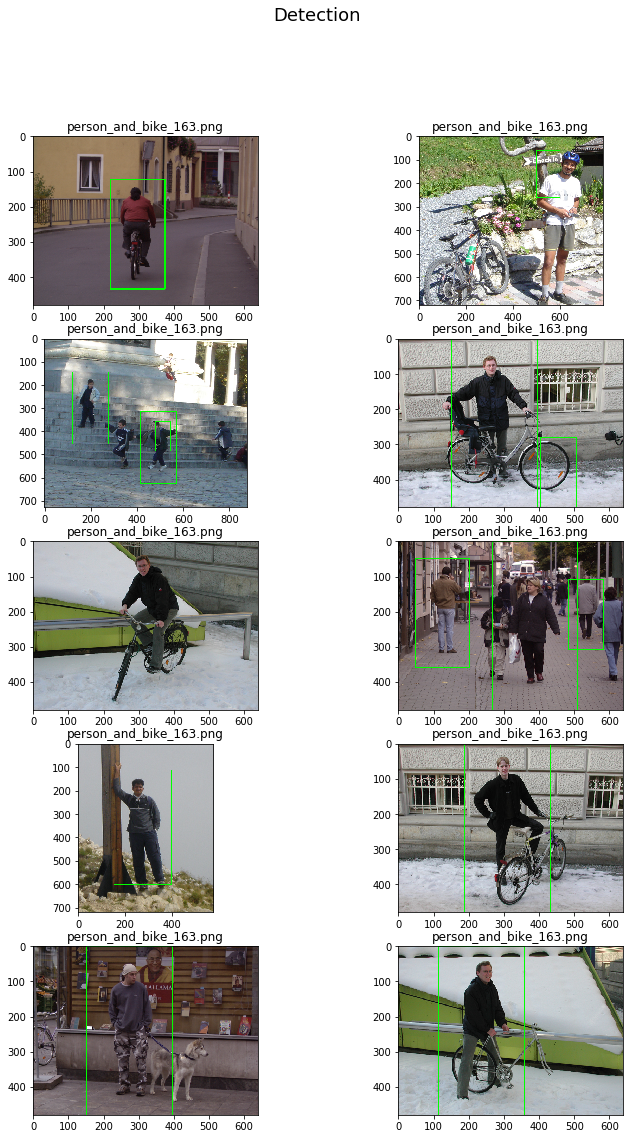

In [8]:
plt.figure(figsize=(12, 18))
plt.suptitle('Detection', fontsize=18)
for i in range(10):
    img = draw_bbox(test_path + os.sep + file_list[i], bbox_list_list[i], nms=True)
    plt.subplot(5, 2, i+1)
    plt.title(file)
    plt.imshow(img)
    
plt.show()